In [ ]:
# 2022-07
# several bijections between N and Dyck words / paren strings
# unfinished, I hope I remember what "cat" means

In [27]:
from matplotlib import pyplot as plt

In [42]:
def parens(n):
    bits = bin(n)[2:]  # drop 0b
    # len of 0 runs after each 1
    ms = [len(s) for s in bits.split('1')[1:]]
    return ''.join([f'({parens(m)})' for m in ms])

In [98]:
def parens_old(n):
    bits = bin(n)[2:]  # drop 0b
    if bits == '0':
        bits = '' # no leading zero!
    out = ''
    height = 0
    for i, bit in enumerate(bits):
        if bit == '0':
            height -= 1
            out += ')'
        if bit == '1' or height == 0 or '0' not in bits[i+1:]:
            height += 1
            out += '('
    return out + ')'*height

def parens_cat(n):
    raise NotImplementedError

In [97]:
[print(n, parens_old(n)) for n in range(20)];

0 
1 ()
2 ()()
3 (())
4 ()()()
5 ()(())
6 (()())
7 ((()))
8 ()()()()
9 ()()(())
10 ()(()())
11 ()((()))
12 (())()
13 (()(()))
14 ((()()))
15 (((())))
16 ()()()()()
17 ()()()(())
18 ()()(()())
19 ()()((()))


In [92]:
len([print(n, parens(n)) for n in range(100000) if len(parens(n))==8])

9 ((()))()
10 (())(())
11 (())()()
12 ()((()))
13 ()(())()
14 ()()(())
15 ()()()()
16 (((())))
17 (()())()
24 ()(()())
32 ((())())
64 (()(()))
128 (()()())
256 ((()()))


14

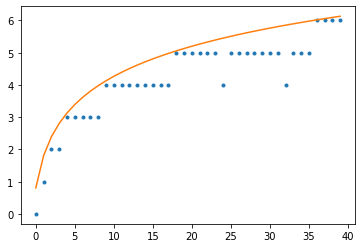

In [67]:
plt.plot([len(parens(i))//2 for i in range(40)], linestyle='none', marker='.')
plt.plot(np.arange(40), np.log2(7*np.arange(40)+7)-2)

In [73]:
record = -1
for i in range(100000):
    if len(parens(i)) > record:
        record = len(parens(i))
        print(i)
        print(bin(i))
        print(parens(i))
        print(record//2)
        print(np.log2(7*i+7)-2)
        print(np.log2(7*i+4)-2)
        print()

0
0b0

0
0.8073549220576042
0.0

1
0b1
()
1
1.8073549220576042
1.4594316186372973

2
0b10
(())
2
2.3923174227787607
2.169925001442312

4
0b100
((()))
3
3.1292830169449664
3.0

9
0b1001
((()))()
4
4.129283016944966
4.066089190457772

18
0b10010
((()))(())
5
5.05528243550119
5.022367813028454

36
0b100100
((()))((()))
6
6.016808287686555
6.0

73
0b1001001
((()))((()))()
7
7.016808287686555
7.00842862207058

146
0b10010010
((()))((()))(())
8
8.007027266893969
8.002815015607053

292
0b100100100
((()))((()))((()))
9
9.002111776479852
9.0

585
0b1001001001
((()))((()))((()))()
10
10.002111776479852
10.001056274634779

1170
0b10010010010
((()))((()))((()))(())
11
11.00088028255882
11.0003521774803

2340
0b100100100100
((()))((()))((()))((()))
12
12.000264141169616
12.0

4681
0b1001001001001
((()))((()))((()))((()))()
13
13.000264141169616
13.000132076629967

9362
0b10010010010010
((()))((()))((()))((()))(())
14
14.00011006469797
14.000044026886826

18724
0b100100100100100
((()))((()))((()))((

In [79]:
np.log2(7*4681+1)

15.0

In [82]:
np.log2(7*2340+4)

14.0

In [83]:
7*2340+4

16384

In [76]:
len(parens(4681))

26

In [77]:
7*4681+1

32768

In [53]:
import numpy as np

In [74]:
(2**15-1)/7

4681.0

In [56]:
0b1001001/0b10000000

0.5703125

In [64]:
print(4/7)
print(1/np.sqrt(3))
print(np.euler_gamma)

0.5714285714285714
0.5773502691896258
0.5772156649015329


In [63]:
np.euler_gamma**2

0.33317792380771866

In [62]:
print(bin(int(2**20 * 4/7)))
print(bin(int(2**20 / np.sqrt(3))))
print(bin(int(2**20 * np.euler_gamma)))

0b10010010010010010010
0b10010011110011010011
0b10010011110001000110
